CSV data saved to data/data.csv
MSE_ARIMA: 2.4466258433775416
R²_ARIMA: -0.15095621597882047


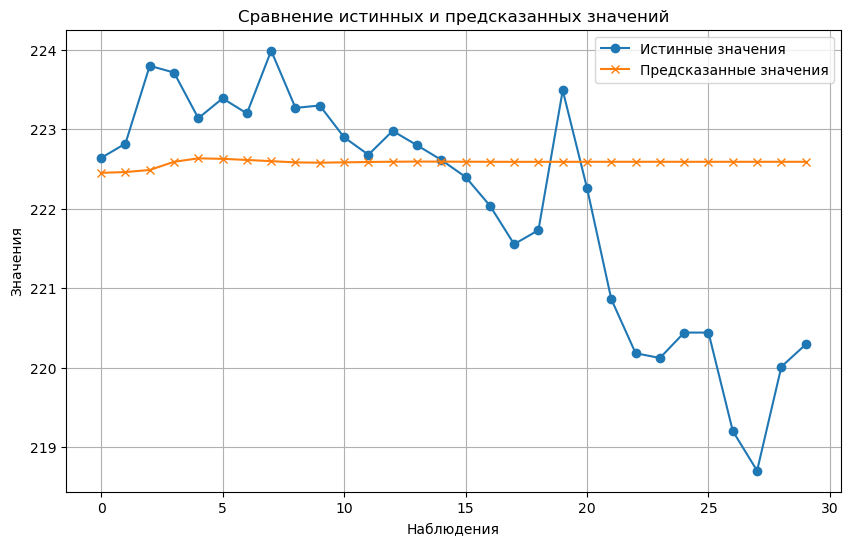

MSE_Linear: 0.27574811164493995
R²_Linear: 0.9451656963397244


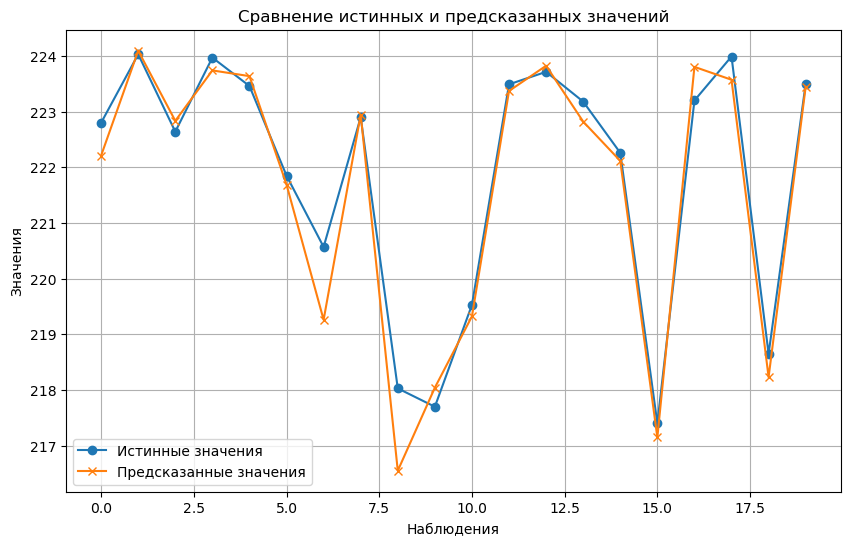

Лучшая модель: Линейная регрессия


In [20]:
from mod import (download_csv, arima, linear, mser2, visual)
from colorama import Fore, Style, init

def main():
    # Загрузка данных
    url = "https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=60min&apikey=RL0R7TG1HKB1VPB0&datatype=csv"
    filedata = 'data/data.csv'
    download_csv(url,filedata)
    # Запускаем ARIMA
    test, forecast = arima(filedata)
    # Считаем MSE, R2
    mse_a,r2_a = mser2(test, forecast)
    print('MSE_ARIMA:', mse_a)
    print('R²_ARIMA:', r2_a)
    # Выводим график модели ARIMA
    visual(test, forecast)
    # Запускаем Линейную регрессию
    y_test,y_pred = linear(filedata) 
    # Считаем MSE, R2 для линейной регрессии
    mse_l,r2_l = mser2(y_test,y_pred)
    print('MSE_Linear:', mse_l)
    print('R²_Linear:', r2_l)
    # Выводим график модели Линейной Регрессии
    visual(y_test,y_pred)
    if mse_l < mse_a and r2_l > r2_a: 
        best_model = "Линейная регрессия" 
    else: 
        best_model = "ARIMA"
    print(Fore.GREEN + Style.BRIGHT + f"Лучшая модель: {best_model}")
    
if __name__ == "__main__":
    main()